<a href="https://colab.research.google.com/github/HyeonhoonLee/KIOM_KDC/blob/master/KDC_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KIOM 한의임상정보은행 data 분석하기

일단 데이터를 추출해서 상관분석을 전부 돌려보자.

# 라이브러리 로드

In [ ]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#한글 폰트 설정

In [ ]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [ ]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

#데이터 불러오기

- 데이터 로드 주소: https://www.data.go.kr/data/3072201/fileData.do
- 임상정보은행 사이트에서 상세이용방법 확인가능 (https://kdc.kiom.re.kr/html/?pmode=subpage&MMC_pid=200&spSeq=22)

In [ ]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

##UTF-8이 아니면, encoding=에다가 cp949나 euc-kr을 넣어줘야한다.
df = pd.read_csv("/content/drive/My Drive/DataCollection/KIOM_KDC/data/한의임상정보은행 교육용 데이터 (2016.10.27)..csv", encoding="cp949")
df.shape

(500, 73)

In [ ]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.sample(5)

,대상자식별코드,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
498,KDCT00499,1,51.263,7,4,2,1,1,3,2,1,1,1,1,1,1,1,3,2,1,2,3,3,2,999,3,2,2,1,1,2,2,3,1.0,2,3,2,2,1,2,14,3,2,1,1,2,7,0,2,0,0,1,0,0,3,171.1,68.3,23.3,54.4,38.0,97.3,94.0,87.0,86.0,89.5,91.4,110,80,85,172,127,49,109
321,KDCT00322,1,42.321,3,5,2,999,999,2,2,3,2,2,3,3,2,3,3,3,3,3,3,3,2,3,1,3,3,1,1,3,2,3,0.0,3,3,3,2,3,2,10,2,1,1,1,3,7,30,1,0,0,0,0,0,1,172.0,72.9,24.6,59.5,37.5,96.5,93.0,88.0,93.0,100.0,101.5,120,60,81,198,72,54,123
467,KDCT00468,1,15.874,14,3,1,999,999,3,2,1,3,3,3,3,2,3,3,3,3,3,3,3,2,1,1,2,3,1,1,1,3,3,0.0,3,3,3,1,2,2,12,2,1,1,1,3,5,0,2,0,1,0,0,0,2,164.6,62.9,23.2,56.0,34.0,87.3,86.3,80.6,77.3,79.8,92.0,120,77,76,150,77,40,110
338,KDCT00339,2,39.315,2,5,2,999,999,3,2,1,2,2,1,1,3,3,3,2,1,1,1,1,2,2,3,3,3,2,2,2,3,2,1.0,1,3,3,3,3,1,6,1,1,1,1,4,8,0,3,1,1,1,0,0,2,159.0,54.0,21.4,55.0,30.0,81.0,82.0,68.0,68.7,91.0,93.0,168,68,100,188,68,68,102
120,KDCT00121,2,74.370,6,1,2,999,999,1,1,1,1,1,2,1,2,2,2,2,2,2,2,3,2,1,1,3,2,3,2,2,999,999,2.0,1,2,2,3,2,1,9,1,1,1,1,2,5,0,3,0,0,1,0,0,2,151.8,49.1,21.3,53.0,32.0,84.0,83.0,80.0,75.0,81.0,87.0,140,80,101,149,134,44,72


#기본정보 보기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대상자식별코드        500 non-null    object 
 1   성별             500 non-null    int64  
 2   만나이            500 non-null    float64
 3   직업분류           500 non-null    int64  
 4   학력             500 non-null    int64  
 5   결혼유무           500 non-null    int64  
 6   음주력            500 non-null    int64  
 7   흡연력            500 non-null    int64  
 8   성격_대범_섬세       500 non-null    int64  
 9   성격_행동빠름_행동느림   500 non-null    int64  
 10  성격_적극_소극       500 non-null    int64  
 11  성격_직접_간접       500 non-null    int64  
 12  성격_포기빠름_포기느림   500 non-null    int64  
 13  성격_외향_내성       500 non-null    int64  
 14  성격_동적_정적       500 non-null    int64  
 15  성격_쉽게_어렵게      500 non-null    int64  
 16  성격_남성적_여성적     500 non-null    int64  
 17  성격_참을성부족_잘찾음   500 non-null    int64  
 18  성격_큰편_적은편 

In [ ]:
# 컬럼들을 한번에 확인합니다.
df.columns

Index(['대상자식별코드', '성별', '만나이', '직업분류', '학력', '결혼유무', '음주력', '흡연력', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '수면시간(시간)',
       '수면시간(분)', '피로정도', '피로_기상시', '피로_오전', '피로_오후', '피로_밤', '피로_하루종일',
       '한의사체질진단', '키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', '가슴둘레', '늑골둘레',
       '허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '혈당', '총콜레스테롤', '중성지방',
       '고밀도콜레스테롤', '저밀도콜레스테롤'],
      dtype='object')

In [ ]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

대상자식별코드      object
성별            int64
만나이         float64
직업분류          int64
학력            int64
             ...   
혈당            int64
총콜레스테롤        int64
중성지방          int64
고밀도콜레스테롤      int64
저밀도콜레스테롤      int64
Length: 73, dtype: object

#결측치 보기

In [ ]:
# 데이터 메뉴얼 상 결측치를 999로 표현하였다고 하였습니다.
# 999를 NaN 값으로 바꿔줍니다. 
df = df.replace(999, pd.np.nan)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대상자식별코드        500 non-null    object 
 1   성별             500 non-null    int64  
 2   만나이            500 non-null    float64
 3   직업분류           500 non-null    int64  
 4   학력             500 non-null    int64  
 5   결혼유무           500 non-null    int64  
 6   음주력            26 non-null     float64
 7   흡연력            26 non-null     float64
 8   성격_대범_섬세       500 non-null    int64  
 9   성격_행동빠름_행동느림   500 non-null    int64  
 10  성격_적극_소극       500 non-null    int64  
 11  성격_직접_간접       500 non-null    int64  
 12  성격_포기빠름_포기느림   500 non-null    int64  
 13  성격_외향_내성       500 non-null    int64  
 14  성격_동적_정적       499 non-null    float64
 15  성격_쉽게_어렵게      499 non-null    float64
 16  성격_남성적_여성적     500 non-null    int64  
 17  성격_참을성부족_잘찾음   500 non-null    int64  
 18  성격_큰편_적은편 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 결측치 보기
df.isnull().sum()

대상자식별코드     0
성별          0
만나이         0
직업분류        0
학력          0
           ..
혈당          3
총콜레스테롤      3
중성지방        3
고밀도콜레스테롤    3
저밀도콜레스테롤    3
Length: 73, dtype: int64

In [ ]:
# 데이터의 통계량 요약
df.describe()

,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
count,500.000000,500.000000,500.000000,500.000000,500.000000,26.0,26.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,499.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,421.000000,474.000000,500.000000,500.00000,500.000000,498.000000,500.000000,500.000000,267.000000,267.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000,499.000000,499.000000,500.000000,500.000000,500.00000,499.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,1.672000,48.069266,8.882000,3.824000,1.858000,2.0,2.615385,2.176000,1.65400,1.716000,1.886000,1.904000,2.184000,1.933868,2.064128,1.968000,2.346000,1.842000,2.162000,1.872000,1.704000,2.220000,2.078385,1.658228,1.554000,2.53600,2.176000,1.945783,1.412000,2.060000,2.490637,2.314607,0.964200,1.792000,2.102000,2.302000,2.302000,2.288577,2.016000,11.176353,2.002004,1.264000,1.086000,1.14600,3.392786,6.40000,3.020000,2.820000,0.268000,0.188000,0.438000,0.136000,0.112000,1.950000,160.97000,60.706400,23.371800,55.709400,34.745600,89.906400,90.988800,81.138000,83.340600,89.708600,93.276800,119.726000,76.18600,98.297787,186.162978,124.738431,48.418511,107.609658
std,0.469955,16.255799,5.192109,1.425865,0.571392,0.8,0.637302,0.728069,0.73985,0.759274,0.859349,0.789957,0.821885,0.862910,0.847804,0.819952,0.784548,0.793912,0.846871,0.812981,0.790971,0.782832,0.508062,0.736590,0.869826,0.75488,0.803938,0.836222,0.492688,0.590845,0.668087,0.703303,1.038506,0.798757,0.827627,0.772003,0.715416,0.871739,0.759538,2.782071,0.797836,0.441241,0.280645,0.35346,0.832346,1.34894,9.167753,0.917215,0.443361,0.391103,0.496638,0.343132,0.315682,0.865447,7.97925,10.357766,3.255029,1.921947,3.280354,7.874771,8.271645,9.230041,9.532691,7.728651,6.574386,15.963979,11.14036,25.928326,34.194999,81.124233,12.349330,30.422902
min,1.000000,10.008000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,140.00000,32.000000,15.600000,51.000000,27.000000,66.000000,64.000000,59.900000,60.000000,69.900000,74.000000,79.000000,42.00000,54.000000,110.000000,28.000000,23.000000,25.000000
25%,1.000000,37.351000,3.000000,3.000000,2.000000,1.0,2.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.00000,1.750000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.00000,3.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,155.67500,54.000000,21.200000,54.400000,32.200000,85.000000,86.175000,74.975000,76.650000,84.000000,89.000000,110.000000,70.00000,85.000000,160.000000,71.000000,39.000000,86.000000
50%,2.000000,49.798500,8.000000,4.000000,2.000000,2.0,3.000000,2.000000,1.00000,2.000000,2.00000

#결측치 처리

In [ ]:
#먼저 음주력과 흡연력이 있는 컬럼은 결측치가 너무 많아서 decision tree 모델을 사용할 수 없으므로 제거합니다.
#대상자식별코드도 현재 의미 없으므로 제거합니다.
df_sub = df[df.columns.difference(["대상자식별코드","음주력","흡연력"])].copy()
df_sub.shape

(500, 70)

In [ ]:
#결측치가 있는 행을 제거합니다.
df_sub2 = df_sub.dropna(axis=0)
df_sub2.shape

(204, 70)

#학습, 예측 데이터셋 나누기

In [ ]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df_sub2.shape[0] * 0.8)
split_count

163

In [ ]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df_sub2[:split_count].copy()
train.shape

(163, 70)

In [ ]:
test = df_sub2[split_count:].copy()
test.shape

(41, 70)

# train에 사용할 데이터셋 만들기



In [ ]:
#컬럼명 확인하기
train.columns

Index(['BMI', '가슴둘레', '겨드랑이둘레', '결혼유무', '고밀도콜레스테롤', '고지혈증_진단', '고혈압_진단',
       '곡골둘레', '늑골둘레', '당뇨_진단', '대변굳기', '대변습관', '땀기분', '땀정도', '만나이', '목둘레',
       '몸무게', '배변시긴박감', '배변후잔변감', '성격_가끔흥분_이성적', '성격_남성적_여성적', '성격_대범_섬세',
       '성격_덜렁_꼼꼼', '성격_동적_정적', '성격_쉽게_어렵게', '성격_외향_내성', '성격_잘드러냄_안드러냄',
       '성격_잘표현_표현안하는편', '성격_적극_소극', '성격_직접_간접', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_포기빠름_포기느림', '성격_행동빠름_행동느림', '성별', '소변야간뇨', '소화여부', '소화입맛',
       '수면시간(분)', '수면시간(시간)', '수축기혈합', '식사량', '식사속도', '음수온다', '음수정도', '이마둘레',
       '이완기혈압', '일반건강', '장골둘레', '저밀도콜레스테롤', '중성지방', '직업분류', '총콜레스테롤', '키',
       '피로_기상시', '피로_밤', '피로_오전', '피로_오후', '피로_하루종일', '피로정도', '학력', '한열그룹',
       '한열민감도', '한열발부위', '한열배부위', '한열손부위', '한열점수', '한의사체질진단', '허리둘레', '혈당'],
      dtype='object')

In [ ]:
# x_train 라는 변수에 "대상자식별코드", "한의사체질진단" 칼럼을 제외하고 학습과 예측에 사용할 df를 가져옵니다.
x_train = train[train.columns.difference(["한의사체질진단"])].copy()
x_train.shape

(163, 69)

In [ ]:
# y_train 이라는 변수에 예측할 컬럼의 데이터를 담습니다.

y_train = train[["한의사체질진단"]].copy()
y_train.shape

(163, 1)

#Test에 사용할 데이터셋 만들기

In [ ]:
x_test = test[test.columns.difference(["한의사체질진단"])].copy()
y_test = test[["한의사체질진단"]].copy()
print(x_test.shape)
print(y_test.shape)

(41, 69)
(41, 1)


# 머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=22)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

# 학습(훈련)

* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

#예측

* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 2, 2, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       3, 1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 1, 2, 2, 2, 3, 1, 2, 3])

#트리 알고리즘 분석하기

- 의사결정나무를 시각화합니다.

In [ ]:
# feature_names 라는 변수에 학습 사용한 컬럼명을 가져옵니다.
feature_names = x_train.columns.tolist()
feature_names

['BMI',
 '가슴둘레',
 '겨드랑이둘레',
 '결혼유무',
 '고밀도콜레스테롤',
 '고지혈증_진단',
 '고혈압_진단',
 '곡골둘레',
 '늑골둘레',
 '당뇨_진단',
 '대변굳기',
 '대변습관',
 '땀기분',
 '땀정도',
 '만나이',
 '목둘레',
 '몸무게',
 '배변시긴박감',
 '배변후잔변감',
 '성격_가끔흥분_이성적',
 '성격_남성적_여성적',
 '성격_대범_섬세',
 '성격_덜렁_꼼꼼',
 '성격_동적_정적',
 '성격_쉽게_어렵게',
 '성격_외향_내성',
 '성격_잘드러냄_안드러냄',
 '성격_잘표현_표현안하는편',
 '성격_적극_소극',
 '성격_직접_간접',
 '성격_참을성부족_잘찾음',
 '성격_큰편_적은편',
 '성격_포기빠름_포기느림',
 '성격_행동빠름_행동느림',
 '성별',
 '소변야간뇨',
 '소화여부',
 '소화입맛',
 '수면시간(분)',
 '수면시간(시간)',
 '수축기혈합',
 '식사량',
 '식사속도',
 '음수온다',
 '음수정도',
 '이마둘레',
 '이완기혈압',
 '일반건강',
 '장골둘레',
 '저밀도콜레스테롤',
 '중성지방',
 '직업분류',
 '총콜레스테롤',
 '키',
 '피로_기상시',
 '피로_밤',
 '피로_오전',
 '피로_오후',
 '피로_하루종일',
 '피로정도',
 '학력',
 '한열그룹',
 '한열민감도',
 '한열발부위',
 '한열배부위',
 '한열손부위',
 '한열점수',
 '허리둘레',
 '혈당']

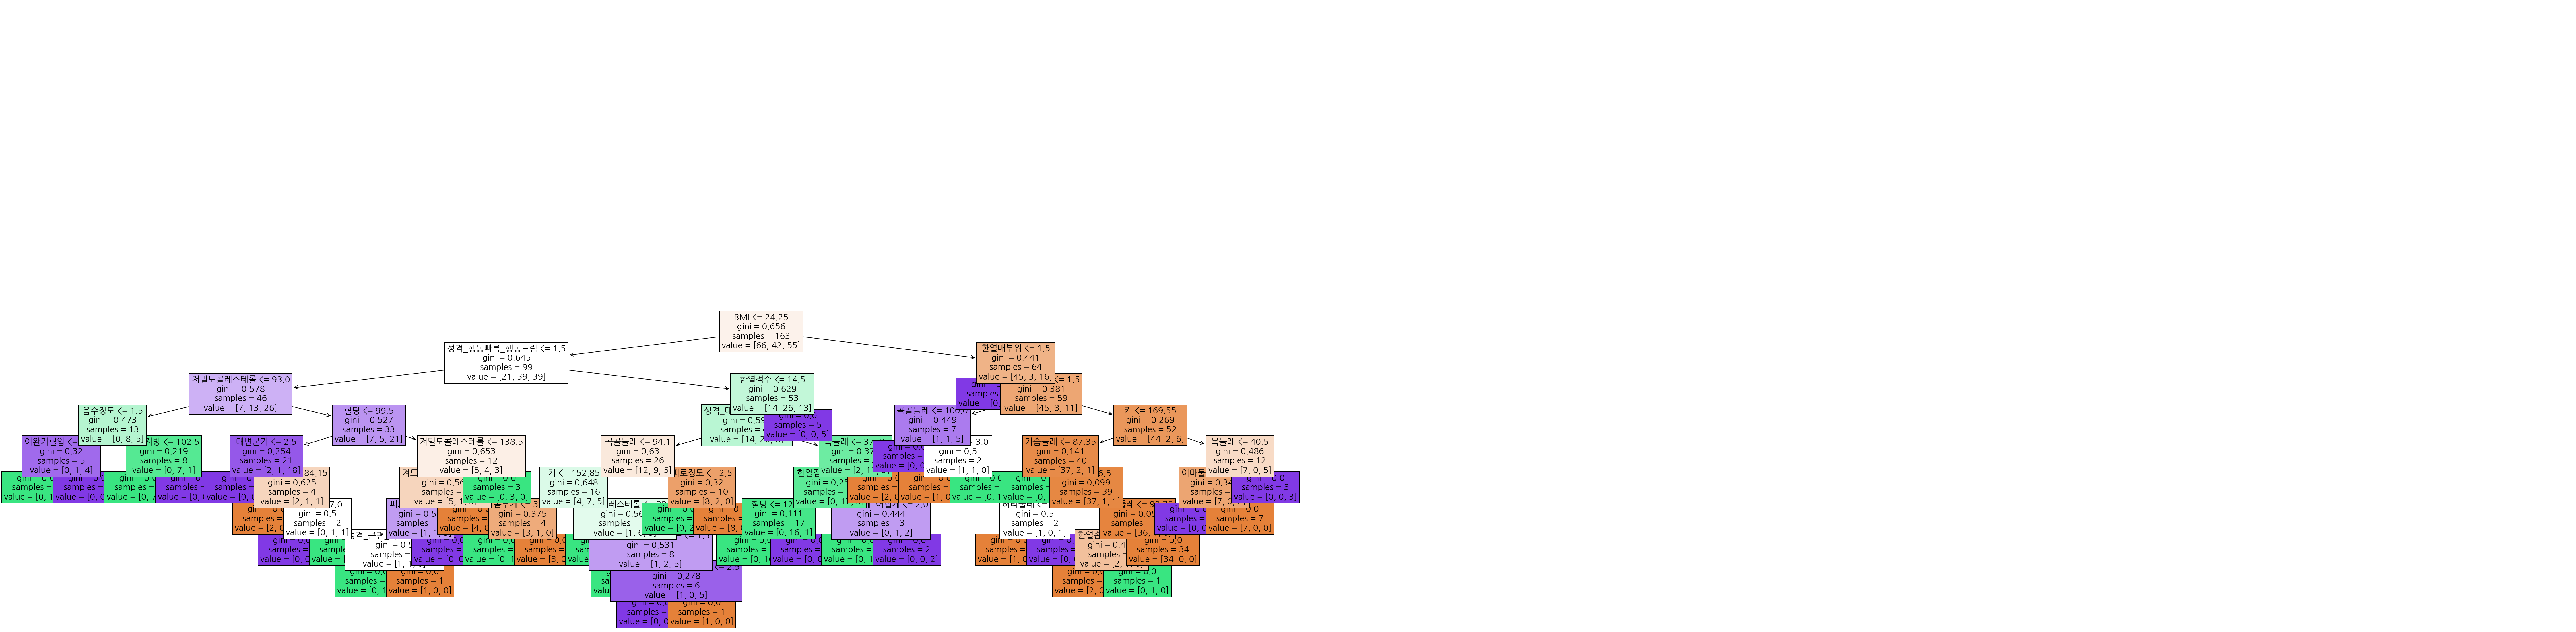

In [ ]:
#시각화를 해봅니다.
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=15)

In [ ]:
#위 그림에서 BMI가 가장 좋은 조건임을 알 수 있다.

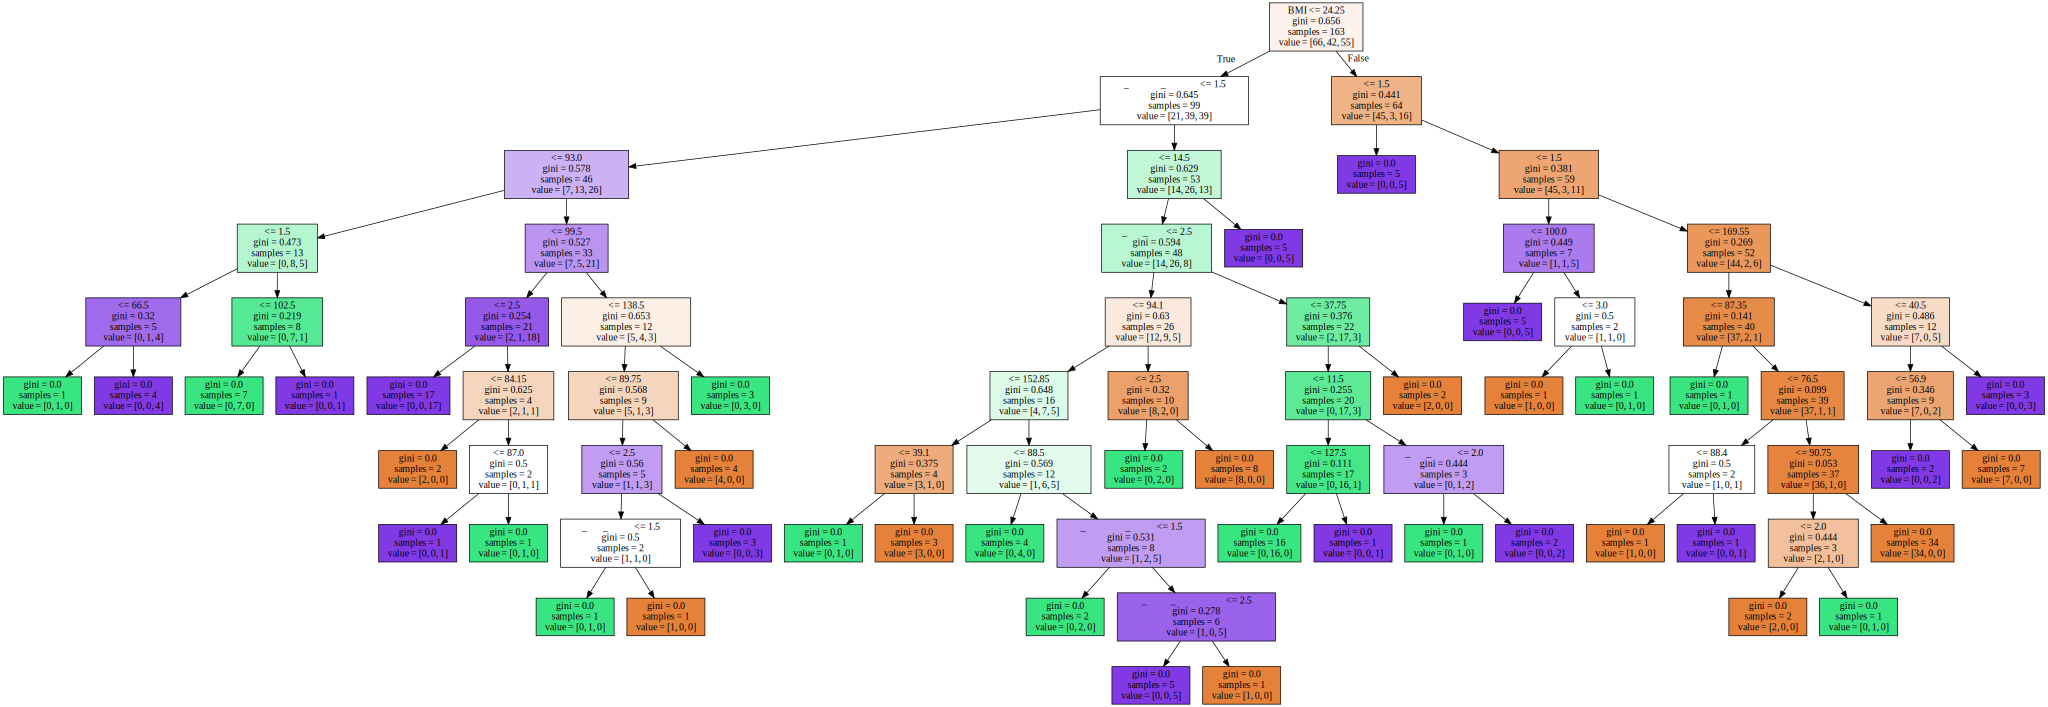

In [ ]:
#graphviz를 통해 훨씬 잘 볼 수 있다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [ ]:
# 피처의 중요도를 추출하기
## 중요도 값에 따라 내림차순 정렬하였다.
model.feature_importances_
importance = sorted(model.feature_importances_, reverse=True)
importance

[0.13900253177435493,
 0.07786082105424248,
 0.07493129428897533,
 0.06307834593199341,
 0.05514673827346004,
 0.053736244134332554,
 0.05206088600974966,
 0.04987776732769027,
 0.04677456382001837,
 0.042642810682583424,
 0.03643246322984834,
 0.03594772422251764,
 0.02910417304356698,
 0.02650558616467707,
 0.02622973617291799,
 0.024166857973676157,
 0.023387281910009185,
 0.021620242832364047,
 0.016874823408914334,
 0.01637109733700643,
 0.015591521273339458,
 0.014967860422405874,
 0.014032369146005511,
 0.012473217018671564,
 0.012473217018671564,
 0.009354912764003675,
 0.009354912764003675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

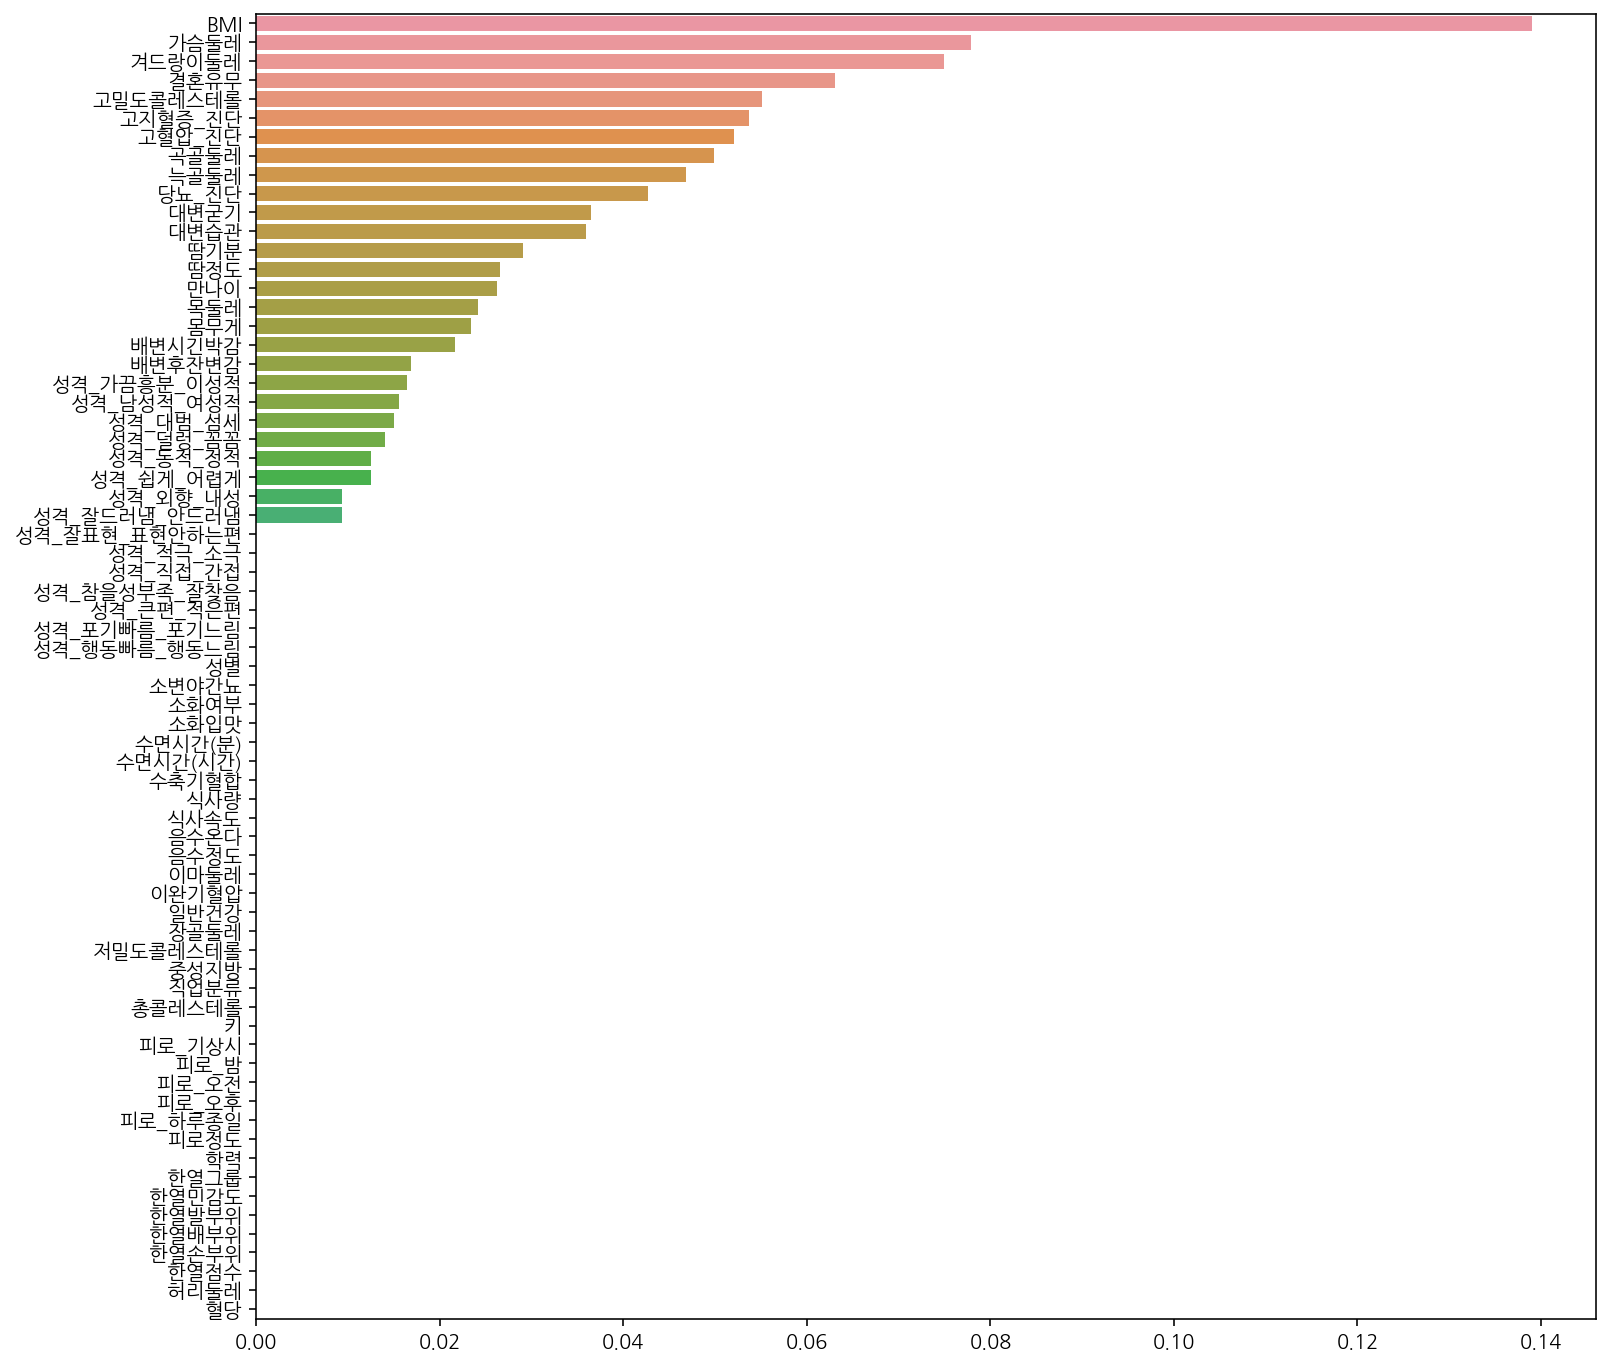

In [ ]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(12,12))
sns.barplot(x=importance, y=feature_names)

# 정확도(Accuracy) 측정하기

In [ ]:
# 예측의 정확도를 구해봅니다.
y_predict_list = y_predict.tolist()
y_test_list = y_test["한의사체질진단"].tolist()
acc = 0
for i in range(len(y_predict_list)):
  if y_predict_list[i] == y_test_list[i]:
    acc += 1
print("정확도 : ", acc/len(y_predict_list))

정확도 :  0.36585365853658536


In [ ]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

36.58536585365854

In [ ]:
# 또다른 방법으로, model 의 score 로 점수를 계산합니다.
model.score(x_test, y_test) * 100

36.58536585365854

# correlation data 시각화

In [ ]:
df_sub2_corr = df_sub2.corr()
df_sub2_corr

,BMI,가슴둘레,겨드랑이둘레,결혼유무,고밀도콜레스테롤,고지혈증_진단,고혈압_진단,곡골둘레,늑골둘레,당뇨_진단,대변굳기,대변습관,땀기분,땀정도,만나이,목둘레,몸무게,배변시긴박감,배변후잔변감,성격_가끔흥분_이성적,성격_남성적_여성적,성격_대범_섬세,성격_덜렁_꼼꼼,성격_동적_정적,성격_쉽게_어렵게,성격_외향_내성,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_적극_소극,성격_직접_간접,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_포기빠름_포기느림,성격_행동빠름_행동느림,성별,소변야간뇨,소화여부,소화입맛,수면시간(분),수면시간(시간),수축기혈합,식사량,식사속도,음수온다,음수정도,이마둘레,이완기혈압,일반건강,장골둘레,저밀도콜레스테롤,중성지방,직업분류,총콜레스테롤,키,피로_기상시,피로_밤,피로_오전,피로_오후,피로_하루종일,피로정도,학력,한열그룹,한열민감도,한열발부위,한열배부위,한열손부위,한열점수,한의사체질진단,허리둘레,혈당
BMI,1.000000,0.827845,0.785571,0.295612,-0.267159,0.087838,0.308454,0.730538,0.792925,0.051789,-0.080372,0.084795,0.033478,-0.261392,0.295098,0.614749,0.795252,0.027716,0.043336,0.067999,-0.327567,-0.166722,0.050186,-0.047226,-0.171309,-0.040634,0.113599,-0.048560,-0.172219,-0.053813,0.151388,0.106863,-0.071644,-0.086643,-0.189290,0.199683,-0.189688,-0.181777,-0.082527,-0.198937,0.248313,-0.035554,-0.120391,0.006832,0.017157,0.436462,0.197233,0.072411,0.733753,0.240906,0.247381,-0.007474,0.175748,0.060695,-0.181589,-0.088287,-0.090035,0.067927,-0.132146,-0.188598,-0.143617,0.194732,0.097829,-0.228894,0.044271,-0.224172,0.217617,-0.320157,0.801932,0.130700
가슴둘레,0.827845,1.000000,0.904014,0.326660,-0.309276,0.117922,0.307384,0.769824,0.890039,0.176028,-0.087397,0.002418,0.046209,-0.249529,0.428175,0.673780,0.790575,0.134682,0.089432,0.167264,-0.318205,-0.141767,0.109106,0.013236,-0.181845,0.014072,0.215470,0.015398,-0.161256,-0.034090,0.129592,0.118628,-0.097940,-0.098220,-0.280276,0.218254,-0.205982,-0.124506,-0.116036,-0.150759,0.345052,-0.073740,-0.147323,0.029514,0.006856,0.421279,0.309783,0.042057,0.784894,0.213273,0.319386,-0.010635,0.167448,0.272021,-0.215279,-0.154479,-0.146342,0.094307,-0.056014,-0.216164,-0.126606,0.161704,0.073016,-0.226164,-0.012868,-0.184137,0.206908,-0.295378,0.851413,0.218850
겨드랑이둘레,0.785571,0.904014,1.000000,0.276006,-0.374185,0.096726,0.300633,0.697647,0.899728,0.137242,-0.022972,0.024518,0.009702,-0.243604,0.323133,0.801497,0.854093,0.158621,0.100438,0.141960,-0.370764,-0.076437,0.118349,0.032911,-0.203845,0.033516,0.246062,0.003225,-0.182231,-0.058444,0.109229,0.098260,-0.102214,-0.113031,-0.535424,0.188155,-0.266786,-0.168239,-0.102860,-0.084484,0.323269,-0.068995,-0.176216,0.058327,-0.032473,0.524930,0.301585,-0.025972,0.700349,0.166884,0.344110,-0.121084,0.099322,0.421686,-0.147378,-0.142854,-0.167588,0.105251,-0.067461,-0.203411,-0.037625,0.227264,0.017148,-0.246231,-0.072827,-0.234218,0.262140,-0.255890,0.809125,0.188373
결혼유무,0.295612,0.326660,0.276006,1.000000,-0.164544,0.213502,0.359581,0.177834,0.333926,0.250299,0.050406,-0.155717,-0.000414,-0.022619,0.651322,0.199405,0.109590,0.133328,0.170078,0.078207,-0.028813,0.010473,0.165621,0.106830,-0.033779,0.120753,0.127159,0.049191,-0.073191,-0.035801,0.066563,0.171073,-0.098007,-0.090958,0.058315,0.334362,-0.147657,0.073159,-0.159228,-0.072188,0.206851,0.083924,-0.004863,-0.041353,0.050337,-0.037871,0.184207,0.243761,0.353556,0.215211,0.206065,-0.080636,0.182107,-0.190612,-0.120350,-0.057821,-0.038843,0.111577,-0.102138,-0.091851,-0.195315,-0.076162,0.005146,-0.073158,0.121040,0.006364,-0.088440,-0.054346,0.395322,0.210738
고밀도콜레스테롤,-0.267159,-0.309276,-0.374185,-0.164544,1.000000,-0.100068,-0.322778,-0.157658,-0.414918,-0.174188,-0.037001,-0.004489,-0.091388,0.227950,-0.222982,-0.408886,-0.309877,-0.071567,-0.140684,-0.108712,0.141289,0.134290,-0.050510,-0.050983,0.135221,-0.212171,-0.171269,-0.061723,0.087141,0.050178,-0.086322,-0.028173,0.004982,0.049343,0.336437,-0.148059,0.244937,0.051639,0.102600,-0.116165,-0.176787,-0.102742,0.129352,-0.023824,0.131572,-0.246887,-0.157910,0.040626,-0.230002,0.022707,-0.357121,-0.084404,0.257932,-0.178991,0.333842,0.100466,0.054938,-0.070758,-0.018196,0.212735,0.243657,-0.185281,-0.043865,0.207952,0.066038,0.096224,-0.215411,0.102082,-0.338749,-0.164284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

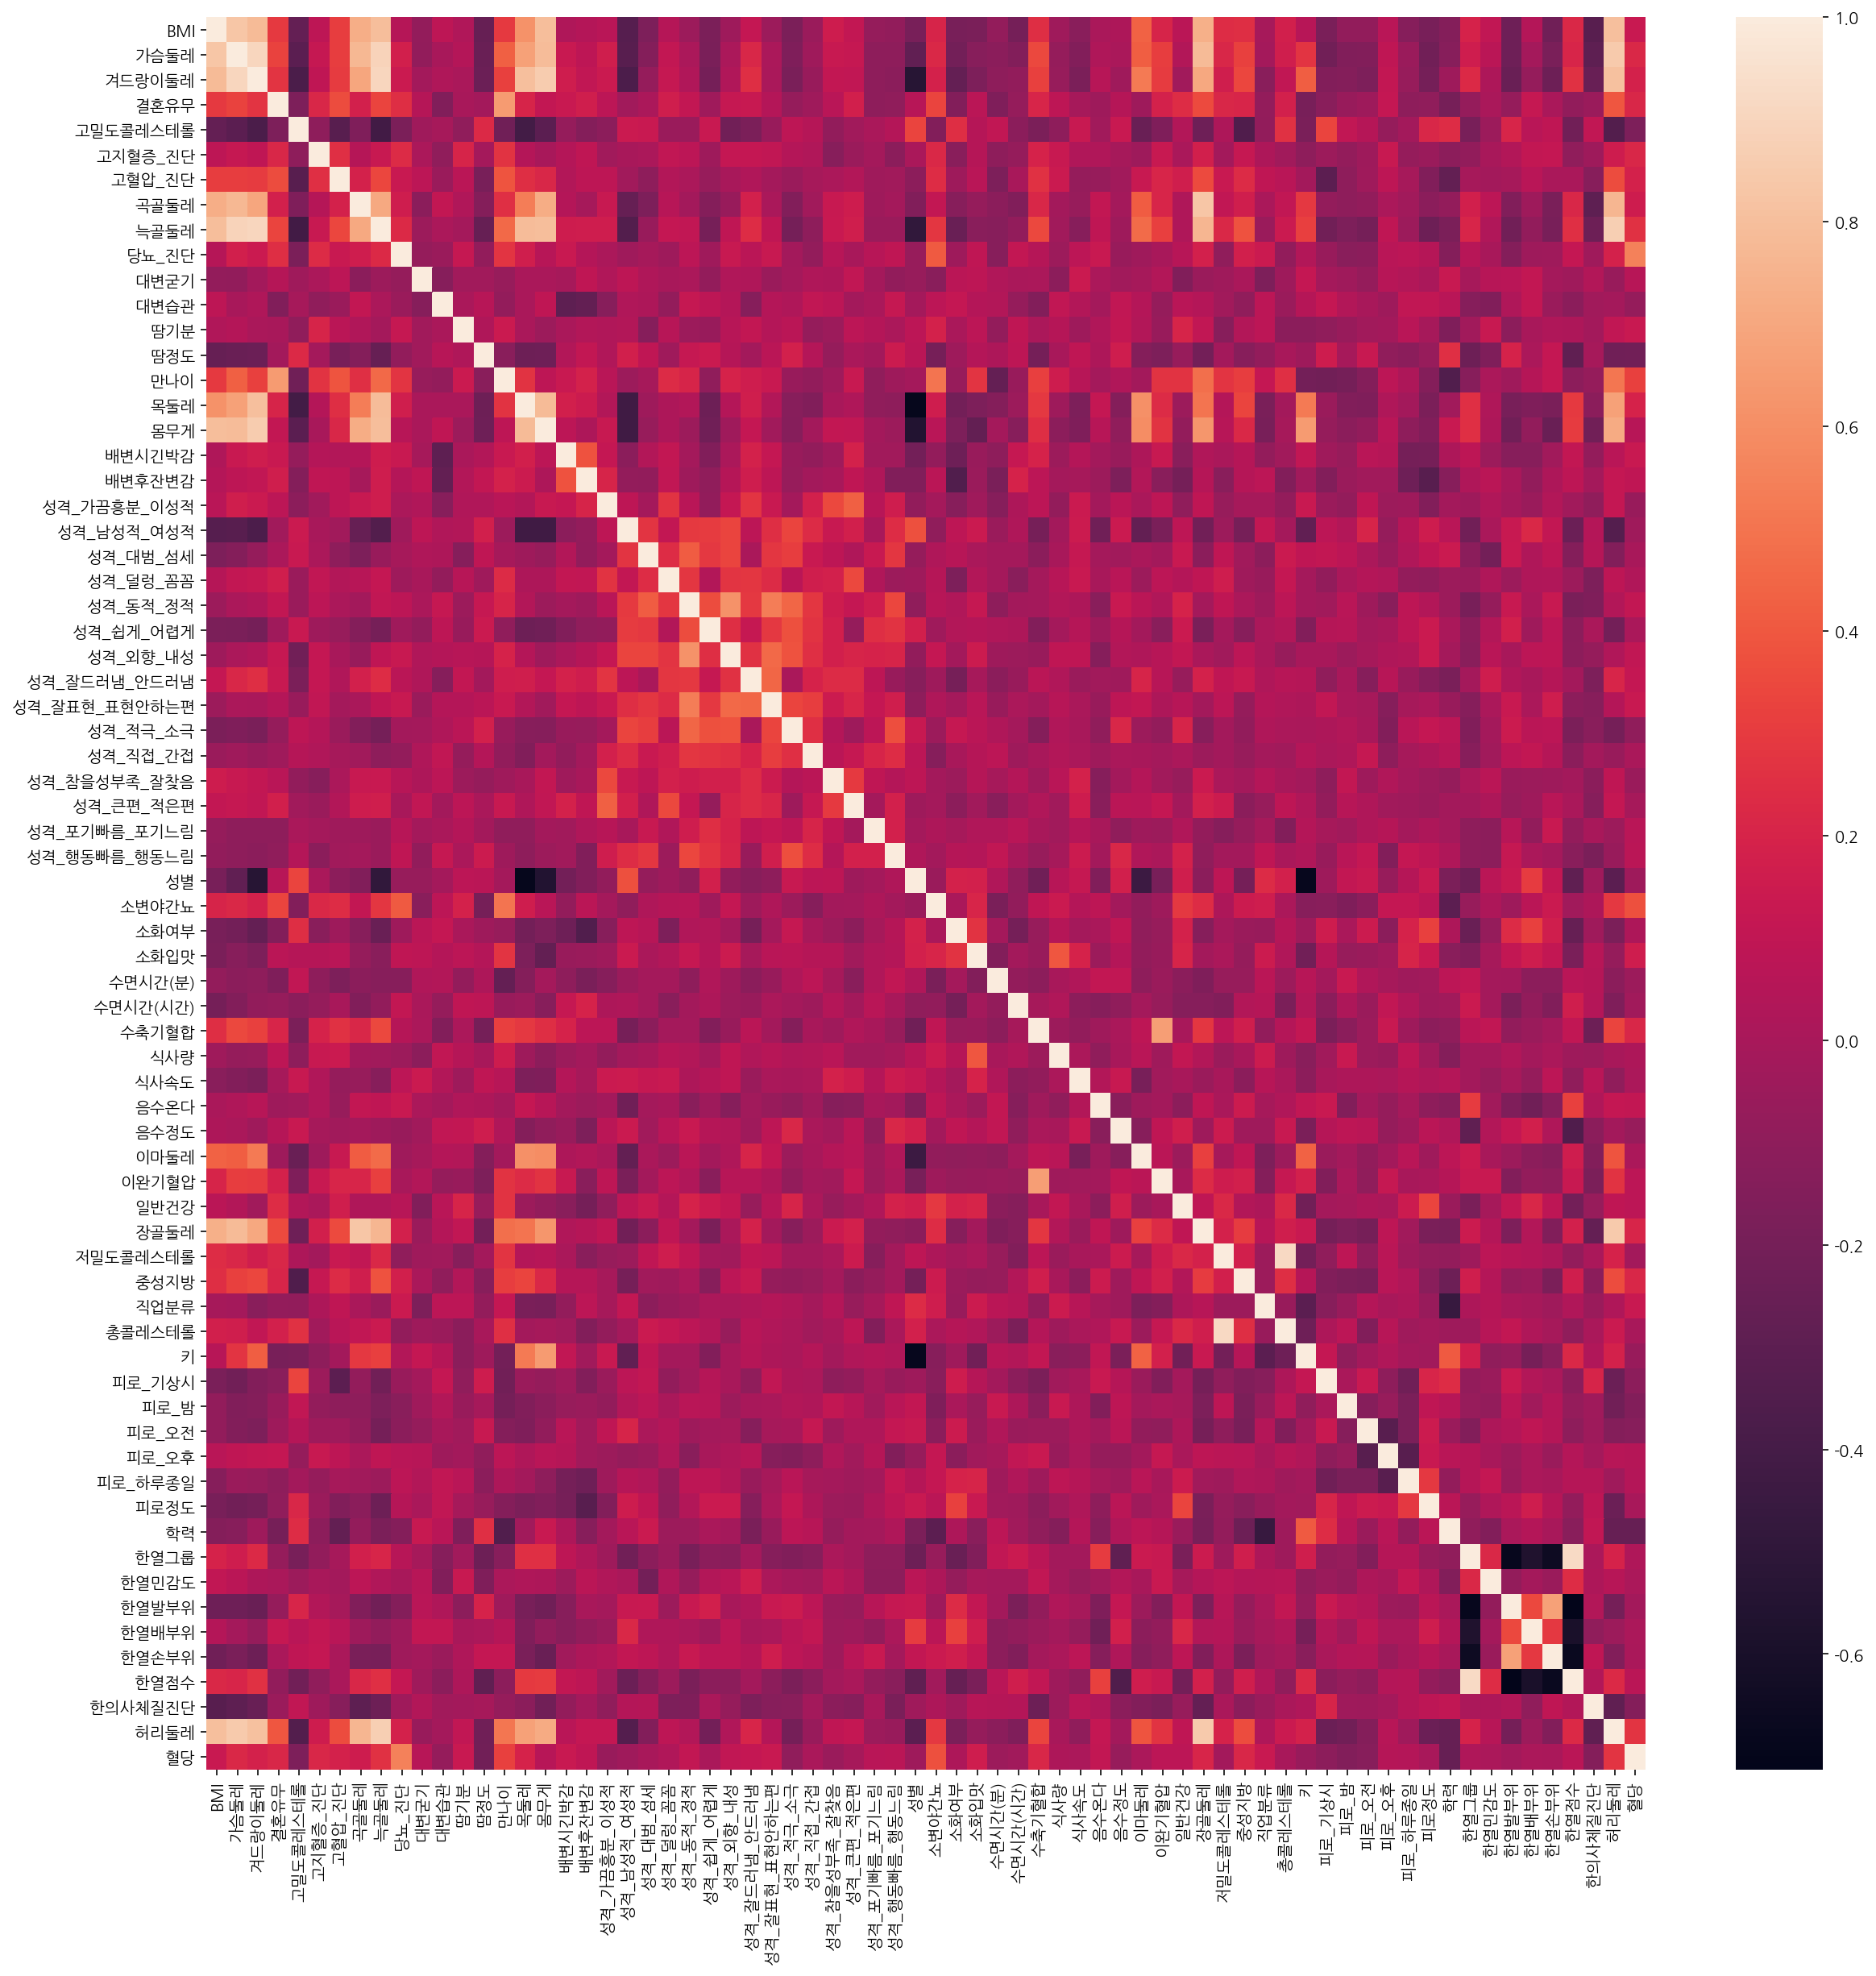

In [ ]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
## 데이터프레임을 통째로 넣어준다.
plt.figure(figsize=(20,20))
sns.heatmap(df_sub2_corr)